In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma, gammainc

# Numerical differentiation for Fundamentals of Non-Ideal Reactors
### Residence Time Distribution (RTD) and Cumulative Distribution Function (CDF)
Elements of fluid can take different routes through a reactor, leading to varying passage times through the vessel. 

The distribution of these times for the fluid stream exiting the vessel is known as the exit age distribution \(E\), or the residence time distribution (RTD). The function \(E\) has units of $[1/\text{time}]$.

Aa step injection experiment was performend on a reactor with $C_0 = 1 [g/l]$. The effluent concentration $C_{out}(t)$ (in $[g/l]$) was measured as a function of time. The experiment's result are collected in a file `cdf_data.csv`.
The measurements represent the exact concentrations at the times listed $[s]$ at the reactor outlet.

We can define the Cumulative Distribution Function (CDF) or F(t) as:
$$
F(t) = \frac{C_{out}(t)}{C_0}
$$

We want to plot the residence time distribution (RTD). To obtain the $E(t)$ curve from the $C(t)$ curve we can use the definition:

$$
E(t) = \frac{dC(t)}{dt}
$$

In [14]:
# Load experimental data
loaded_data = pd.read_csv('cdf_data.csv')
time = loaded_data['Time']
Cout = loaded_data['Cout']

# Normalize data
C0 = 1          # g/l
F_t = Cout/C0   # -

# Compute the PDF using forward finite differences method (first order forward difference)
E_t = np.zeros_like(F_t)
for i in range(len(time) - 1):
    E_t[i] = (F_t[i + 1] - F_t[i]) / (time[i + 1] - time[i])
E_t[-1] = E_t[-2]  # Approximate the last value to avoid out of index error

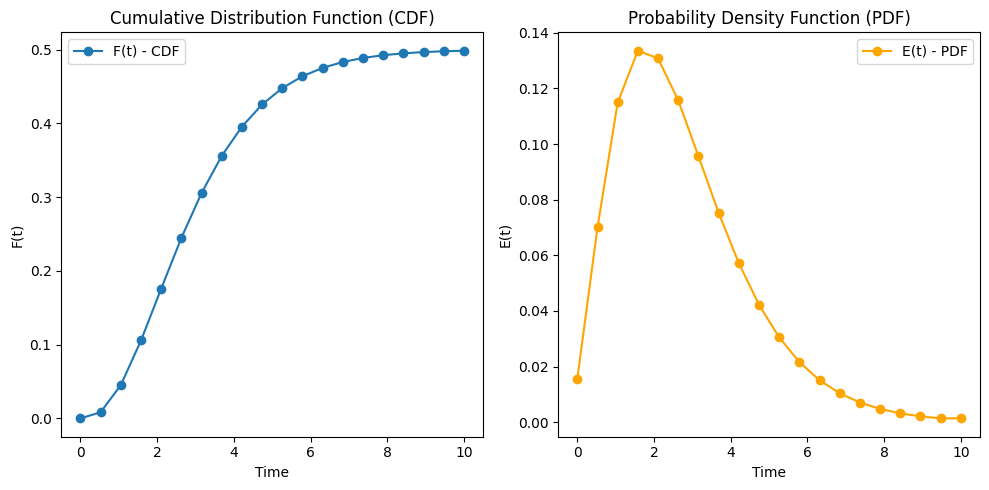

In [15]:
# Plotting the CDF and PDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(time, F_t, 'o-', label='F(t) - CDF')
plt.xlabel('Time')
plt.ylabel('F(t)')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, E_t, 'o-', label='E(t) - PDF', color='orange')
plt.xlabel('Time')
plt.ylabel('E(t)')
plt.title('Probability Density Function (PDF)')
plt.legend()

plt.tight_layout()
plt.show()

**Python built-in function**

In [16]:
# Compute the PDF using forward finite difference (with built-in functions)
E_t = np.zeros_like(F_t)
E_t[:-1] = np.diff(F_t) / np.diff(time)
E_t[-1] = E_t[-2]  # Approximate the last value to avoid out of index error

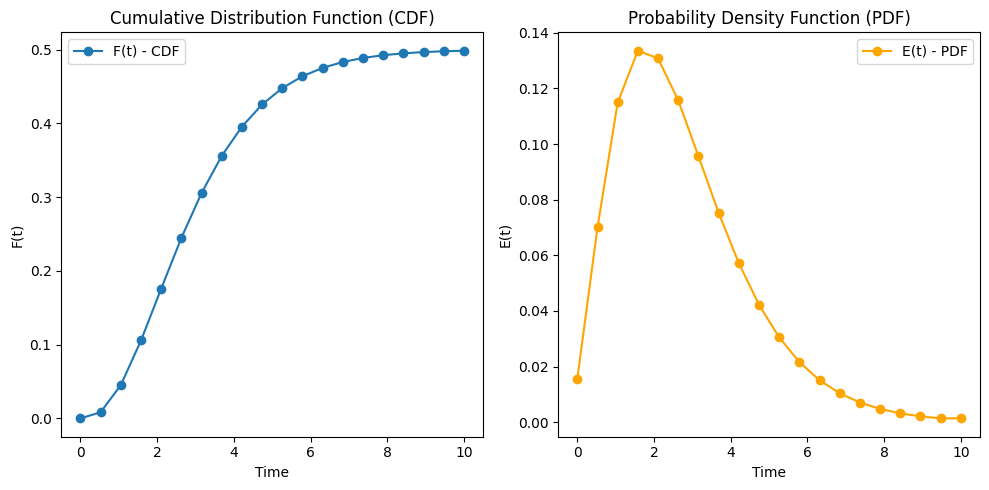

In [17]:
# Plotting the CDF and PDF (you obtain the same plot as before)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(time, F_t, 'o-', label='F(t) - CDF')
plt.xlabel('Time')
plt.ylabel('F(t)')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, E_t, 'o-', label='E(t) - PDF', color='orange')
plt.xlabel('Time')
plt.ylabel('E(t)')
plt.title('Probability Density Function (PDF)')
plt.legend()

plt.tight_layout()
plt.show()